In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Mall_Customers.csv")

In [ ]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
selected_df=df[['Annual Income (k$)',	'Spending Score (1-100)']]

In [ ]:
selected_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalizing the columns
scaler = MinMaxScaler()
selected_df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(selected_df[['Annual Income (k$)', 'Spending Score (1-100)']])


<ipython-input-6-95bf18fba5be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(selected_df[['Annual Income (k$)', 'Spending Score (1-100)']])


In [ ]:
selected_df.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [ ]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Annual Income (k$)      200 non-null    float64
 1   Spending Score (1-100)  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

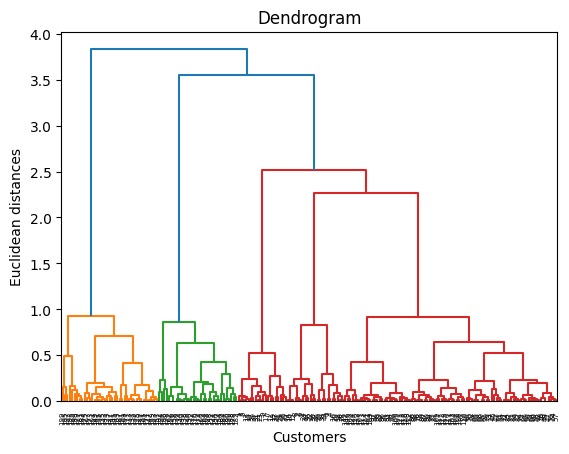

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(selected_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Applying Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(selected_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
selected_df['Cluster'] = y_hc
print(selected_df)

     Annual Income (k$)  Spending Score (1-100)  Cluster
0              0.000000                0.387755        4
1              0.000000                0.816327        3
2              0.008197                0.051020        4
3              0.008197                0.775510        3
4              0.016393                0.397959        4
..                  ...                     ...      ...
195            0.860656                0.795918        0
196            0.909836                0.275510        2
197            0.909836                0.744898        0
198            1.000000                0.173469        2
199            1.000000                0.836735        0

[200 rows x 3 columns]


<ipython-input-11-73dc1b0c8cc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Cluster'] = y_hc


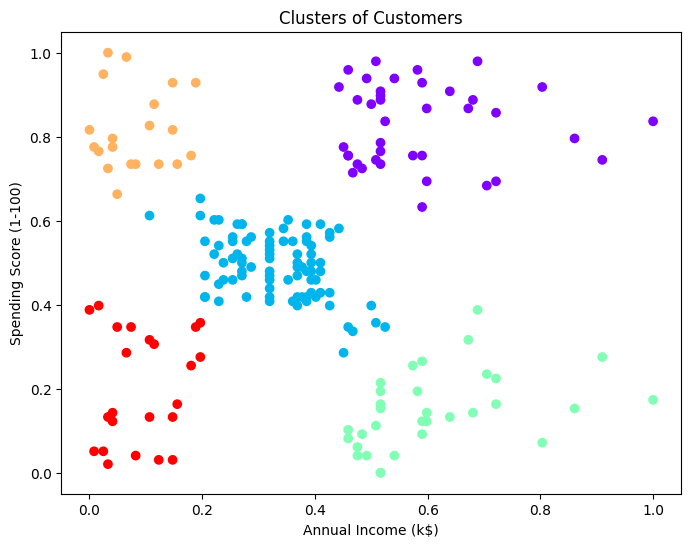

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(selected_df['Annual Income (k$)'], selected_df['Spending Score (1-100)'], c=selected_df['Cluster'], cmap='rainbow')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
df['Genre'] = df['Genre'].replace({'Male': 0, 'Female': 1})


In [ ]:
scaler.fit(df)

StandardScaler()

In [ ]:
scaled_data=scaler.transform(df)

In [ ]:
scaled_data

array([[-1.7234121 , -1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065,  0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992,  0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 ,  0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847,  0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775,  0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702,  0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 , -1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558,  0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485, -1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413,  0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 ,  0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268,  0.88640526, -1.0

In [ ]:
##  Applying PCA Algorithms
from sklearn.decomposition import PCA

In [ ]:
# pca=PCA(n_components=2)
pca=PCA()

In [ ]:
data_pca=pca.fit_transform(scaled_data)

In [ ]:
X = data_pca[:,:4]

In [ ]:
pca.explained_variance_

array([1.99507004, 1.35420929, 0.97725931, 0.67613098, 0.02245601])

Text(0, 0.5, 'Second Principal Component')

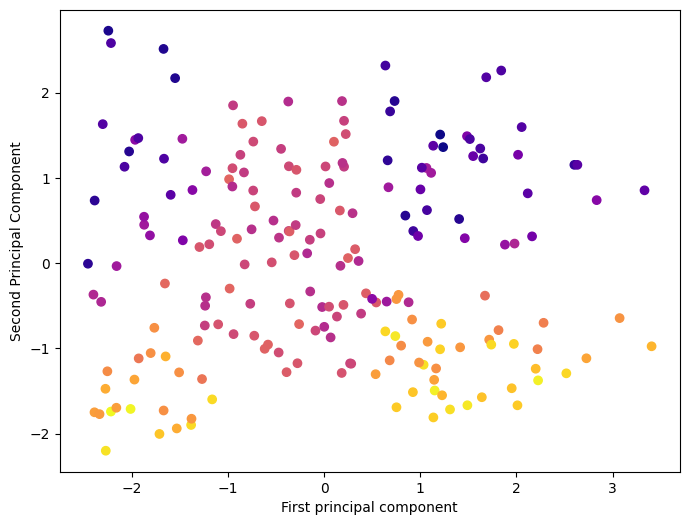

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c=df['Spending Score (1-100)'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

###Scree Plot

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
explained_variance_ratio

array([0.39701894, 0.26948765, 0.1944746 , 0.13455007, 0.00446875])

Principal Component 1: 0.3970 (explains 39.70% of the variance)
Principal Component 2: 0.2695 (explains 26.95% of the variance)
Principal Component 3: 0.1945 (explains 19.45% of the variance)
Principal Component 4: 0.1346 (explains 13.46% of the variance)
Principal Component 5: 0.0045 (explains 0.45% of the variance)


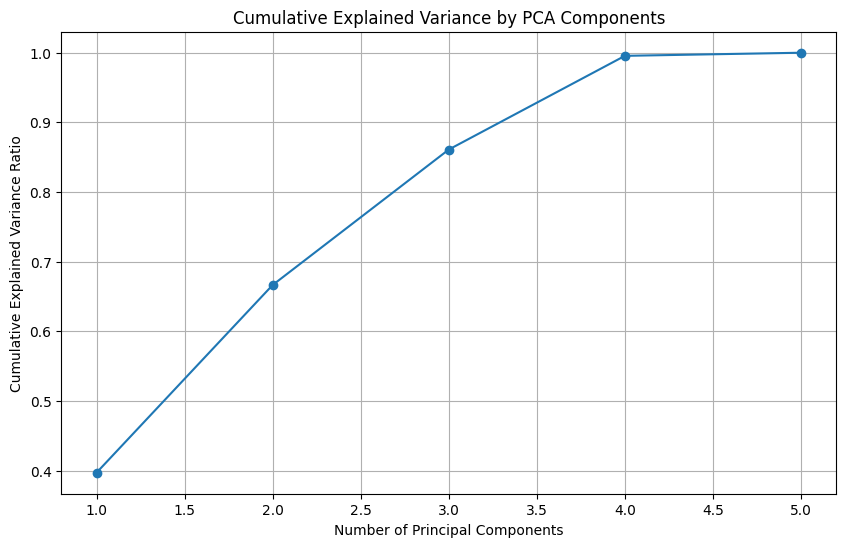

In [ ]:
# Print the explained variance ratio for each principal component
import numpy as np
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f} (explains {ratio*100:.2f}% of the variance)")

# Plot the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
y =df['Spending Score (1-100)']

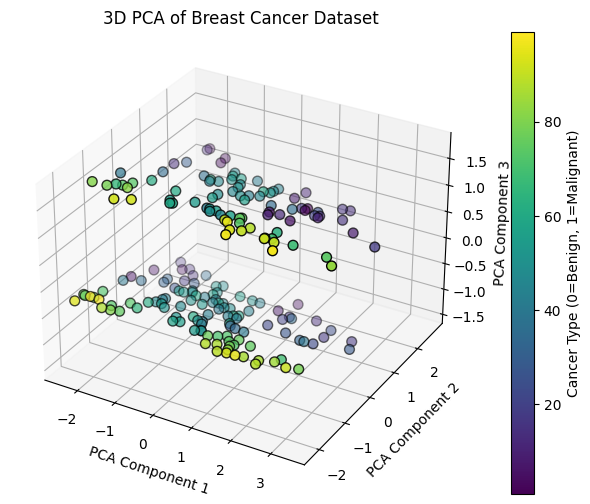

In [ ]:
# Plot the data on the first three principal components
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)
ax.set_title('3D PCA of Breast Cancer Dataset')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.colorbar(sc, label='Cancer Type (0=Benign, 1=Malignant)')
plt.show()    #almost 80% of total representation(information) abit the data


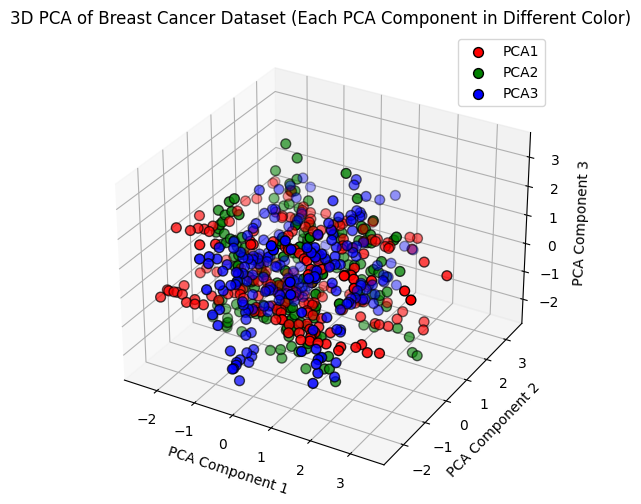

In [ ]:
# Assign different colors for each PCA component
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each PCA component with a different color
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=colors[0], edgecolor='k', s=50, label='PCA1')
ax.scatter(data_pca[:, 1], data_pca[:, 2], data_pca[:, 0], c=colors[1], edgecolor='k', s=50, label='PCA2')
ax.scatter(data_pca[:, 2], data_pca[:, 0], data_pca[:, 1], c=colors[2], edgecolor='k', s=50, label='PCA3')

ax.set_title('3D PCA of Breast Cancer Dataset (Each PCA Component in Different Color)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()
plt.show()